# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
## To centre align the plots 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
## Loading the data
df = pd.read_csv('human_body_temperature.csv')

In [4]:
## What's in our data
print(df.head())
print('_____________________________________________')
print('Number of observations:',format(df.shape[0]))
print('Column Names in the data: ' ,format(df.columns))

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
_____________________________________________
Number of observations: 130
Column Names in the data:  Index(['temperature', 'gender', 'heart_rate'], dtype='object')


In [5]:
## Are they any 'NaN' entries in the data
print("Number of Null entries:", format(df.isnull().sum().sum()))
print('_____________________________________________')

print('Columns types in the data')
df.dtypes

Number of Null entries: 0
_____________________________________________
Columns types in the data


temperature    float64
gender          object
heart_rate     float64
dtype: object

### Problem Statement:
It is believed that the mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F. Here, we are trying to test that concept.

So, defining our hypothesis  
**$H_{0}$**: True population mean body temperature = 98.6$^{\circ}$F    
**$H_{a}$**: True population mean body temperature != 98.6$^{\circ}$F  
**Significance level($ \alpha $)**: we would use in this analysis is 5%

Assumptions of hypothesis testing:  
1. **Normality:** The sampled data should be normal or close to theortical normal distribution. 
2. **Random Sample(Independence between samples):** We want no interdependece between samples 


### Testing assumptions:
**Normality of the Sample data:**  
Normality of data can be tested by visual methods and statistical normal tests.Lets, Start by visual plots. popular visual methods are histogram, q-q plot and emperical cummulative density plot. Each of them have they own up's and down's. we evaluate these methods one by one

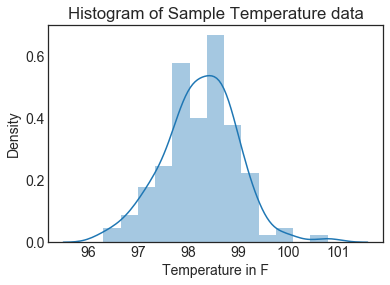

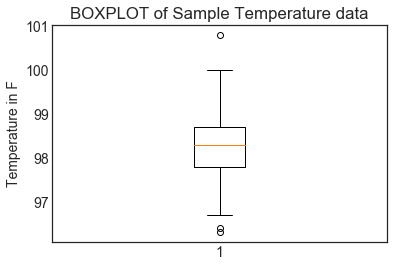

In [6]:
plt.rcParams.update({'font.size': 14})
## Histogram
plt.subplot(1,1,1)
sns.distplot(df.temperature)
plt.xlabel('Temperature in F')
plt.ylabel('Density')
plt.title('Histogram of Sample Temperature data')
plt.show()

#BOXplot
plt.subplot(1,1,1)
plt.boxplot(df.temperature) 
plt.ylabel('Temperature in F')
plt.title('BOXPLOT of Sample Temperature data')
plt.xlabel('')
plt.show()


We see from histogram that the distribution is unimodal and somewhat close to a normal distribution, while 
the box plot shows that they are outliers in the data. 
We need to  plot emperical cummulative distribution plot to statistically infer about normality

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

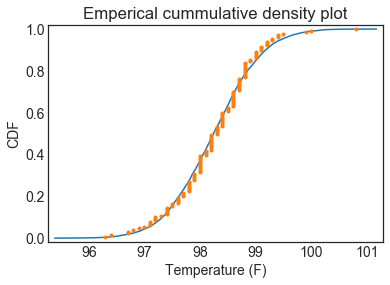

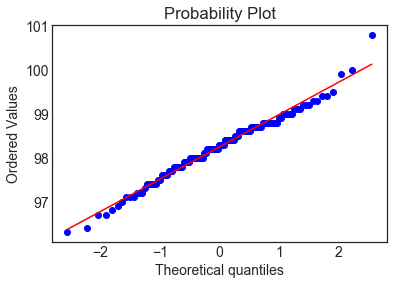

In [8]:
# Compute mean and standard deviation: mu, sigma
mu= np.mean(df.temperature)
sigma = np.std(df.temperature)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma,size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x,y = ecdf(df.temperature)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('CDF')
_ = plt.title('Emperical cummulative density plot')
plt.show()


## Q-Q plot
import scipy.stats as stats
import pylab 

stats.probplot(df['temperature'], dist="norm", plot=pylab)
pylab.show()

From above, ECDF we see that the data follows the therortical normal cummulative density nicely, it also be seen in the Q-Q plot where data follows the theortical quantile line nicely. However, we see some points that do not follow the theortical line at end of the line in Q-Q plot which is not a problem.

In [9]:
## Statistical test for normality
from scipy import stats
shapiro_test = stats.shapiro(df.temperature)
print('p-value from shapiro test:',format(shapiro_test[1]))

p-value from shapiro test: 0.233174666762352


We see that p-value is greater than any common significance level and hence, we cannot reject the null hypothesis. Thus, we say that it is plausible that data might come from a normal distribution. Also, we have 130 observations greater than 30(usually used in statistical community) and from central limit theorm we can say that the data approx. a normal distribution.

**Second Assumption:** Random Sample 
we are not told that the data is collected randomly. However, under proper sampling conditions we can say that the body temperature of one human is not effected by another. Thus, we meet our second assumption


Since, we met requirements of hypothesis testing, we can proceed with conducting hypothesis testing. Before that we need to decide on two tailed or one tailed and t or z test.

Here, we are trying to test if the true popualtion mean temperature is different than hypothesized mean. So, large devaitions greater than or smaller than true popualtion mean would result in rejecting null hypothesis. So, we have to conduct a two-tailed test. Since we are not given the true population standard deviation we should employ t-test than z-test

In [10]:
## Hypothesis testing: t-test
print('p_value from t_test with ',format(df.shape[0]-1),
      'degree of freedoms and t-test statistic',round(stats.ttest_1samp(df.temperature,98.6)[0],3),
      'is:',format(stats.ttest_1samp(df.temperature,98.6)[1])) 

p_value from t_test with  129 degree of freedoms and t-test statistic -5.455 is: 2.4106320415561276e-07


p_value is less than 0.05(significance level we set). Thus, we can reject the null hypothesis. So, we have evidence to say that the true mean temperature is not 98.6 F. 
Lets conduct z-test and see if we observe any difference. We should expect decrease in p-value as t-distribution is thicker at the tails i.e., more points at the tail than a z-distribution.

In [11]:
## z-test
from statsmodels.stats.weightstats import ztest
print('p_value from t_test with ',format(df.shape[0]-1),
      'degree of freedoms and z-test statistic',round(ztest(df.temperature,value=98.6)[0],3),
      'is:',format(ztest(df.temperature,value=98.6)[1])) 

p_value from t_test with  129 degree of freedoms and z-test statistic -5.455 is: 4.9021570141012155e-08


The z-statistic and t-test statistic are same however, we observed high p-value for t-test as explained earlier. 
We will now proceed to down sample and observe how the tests perform. In this case, we might expect larger difference in test statistic and p-values between the tests

In [12]:
## Random Sample
np.random.seed(123)
sample= df.temperature.sample(10)

## T-test
print('p_value from t_test with ',format(len(sample)-1),
      'degree of freedoms and t-test statistic',round(stats.ttest_1samp(sample,98.6)[0],3),
      'is:',format(stats.ttest_1samp(sample,98.6)[1])) 

## z-test
from statsmodels.stats.weightstats import ztest
print('p_value from t_test with ',format(len(sample)-1),
      'degree of freedoms and z-test statistic',round(ztest(sample,value=98.6)[0],3),
      'is:',format(ztest(sample,value=98.6)[1])) 

p_value from t_test with  9 degree of freedoms and t-test statistic -2.908 is: 0.017366648131180197
p_value from t_test with  9 degree of freedoms and z-test statistic -2.908 is: 0.003637051995481729


We observe that p-value has increased significantly from intial case where we used full data set. In this case,
had we set our significance level to be 1% then we would not have rejected null hypothesis under t-test. Thus, we need to be wary of the sample size and perform the right test accordingly. This case, t-test has to be used has sample size is low and true population mean temperature is not known.

### Let's explore what's the temperature range where someone's temperature can be labelled abnormal

To acheive this, we need to find the where most likely our true popualtion mean temperature can be. In this analysis, let us assume we are interested in finding 95% confidence interval(CI) of our true population mean. Any temperature outside 95% CI would be treated as abnormal.  

We know that, sample population mean is normally distributed with parameters,    
N(mean = sample mean, sample standard deviation/sqrt(number of samples))  

Based on this understanding we will find the 95% CI, assumptions of this analysis are sample as for hypothesis testing which we tested previosuly. We would use t-distribution to compute 95% CI as stated earlier we do not know popualtion standard deviation

In [13]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    dic = {'95% CI mean temperature Lower_Limit': ((m-h)),
           '95% CI mean temperature Upper_Limit': ((m+h))
          }
    return dic, m-h,m+h

Output = mean_confidence_interval(df.temperature)
print(Output[0])

{'95% CI mean temperature Lower_Limit': 98.122002905608014, '95% CI mean temperature Upper_Limit': 98.376458632853485}


Now, we have 95% CI for true population mean temperature. Any value outside this range of values between (98.122 to 98.376) would be classified as **'Abnormal'**

In [14]:
abnor_dat= len(df[(df.temperature < Output[1]) | (df.temperature > Output[2])])
print('Percentage of people in the data with **abnormal** temperature are: ',round(abnor_dat*100/df.shape[0]),'%')

Percentage of people in the data with **abnormal** temperature are:  88 %


### Lets's see if there is any significant difference in the mean temperature of between Female and Male gender

Here, we are interested in finding if there is any significant statistical difference in mean temperatures between female and male temperatures.

So, defining our hypothesis  
**$H_{0}$**: Difference in True population mean body temperature between Male and female = 0   
**$H_{a}$**: Difference in True population mean body temperature between Male and female != 0   
**Significance level($ \alpha $)**: we would use in this analysis is 5%

Assumptions of hypothesis testing:  
1. **Normality:** The sampled data should be normal or close to theortical normal distribution. 
2. **Independent Random Sample:** We want no interdependece within samples and between the samples


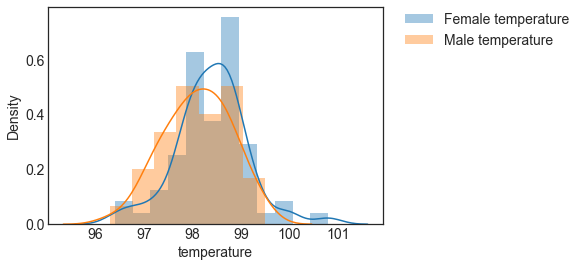

In [15]:
female_temp = df.temperature[df.gender=='F']
male_temp = df.temperature[df.gender=='M']

## Normality test
sns.distplot(female_temp,label = 'Female temperature')
sns.distplot(male_temp,label='Male temperature')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [16]:
## Normality test
print('p-value from shapiro test female data:',format(stats.shapiro(female_temp)[1]))
print('p-value from shapiro test male data:',format(stats.shapiro(male_temp)[1]))

p-value from shapiro test female data: 0.09016574919223785
p-value from shapiro test male data: 0.8545167446136475


We see that p-value is low for female data but more than significance level. Hence, we will not reject null hypothesis. We can also say that male temperatures are not affected by female temperatures and hence we have independence between the two data sets. We already stated that we have random sample that is withing two groups we have not dependence.

Since, we are analyzing if there is difference in mean temperatures between two groups we use two-tailed t-test. We are using t-test instead of z-test because we do not know the population standard deviation.

In [17]:
## Two-tailed t-test
print('p-value from two-tailed t-test for difference in population mean between female and male',
      round(stats.ttest_ind(female_temp,male_temp)[1],4))

p-value from two-tailed t-test for difference in population mean between female and male 0.0239


### Hypothesis testing inference
p-value obtained is less than the significance **$ \alpha $ of 0.05**, we defined earlier. Hence, we have evidence to reject null hypothesis. Hence, we say that the true population mean temperature difference between Female and Male is different.

## Summary
In this notebook, we started our analysis questioning if the true population mean temperature of human is 37$^{\circ}$C or 98.6$^{\circ}$F as reported by Carl Wunderlich. We performed hypothesis testing on the sample data, where we found out that the given the null hypothesis the probability of observing reported temperature is not statistically significant. Hence, we concluded that the true population mean temperature is not 37$^{\circ}$C or 98.6$^{\circ}$F as reported by Carl Wunderlich. Now, we know that the true popualtion mean temperature is different than reported, with 95% confidence we calcuated the interval of where true population mean temperature can lie. We also found out statistically that the difference between mean temperature between Female and Male is differnet.

Finally, in this notebook we learnt how to perform hypothesis testing, checking assumptions and reporitng the results.
